Process data for feature selection

In [36]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

data = pd.read_csv("out/cleanedDataClassOccupation.csv")
X = data.iloc[:, 1:38]  #independent columns
y = data["target"]    #target column i.e price range

# Use train_month_2 data to see the relevance with current month
train_2_data = pd.read_csv("out/cleaned_Train_2.csv")
X_train_2 = train_2_data.iloc[:, 1:38]  #independent columns

In [49]:
def find_the_best(columns, scores, nlargest = 20):
    dfscores = pd.DataFrame(scores)
    dfcolumns = pd.DataFrame(columns)
    # concat two dataframes for better visualization 
    featureScores = pd.concat([dfcolumns,dfscores],axis=1)
    featureScores.columns = ['Feature','Score']  # naming the dataframe columns
    return featureScores.nlargest(nlargest,'Score')  # return best features


## Basic Methodologies to Find Feature Importance

                              Feature     Score
19                  bal_mortgage_loan  0.994915
18                  bal_personal_loan  0.962014
8                   has_mortgage_loan  0.665241
5   has_life_insurance_decreasing_cap  0.469793
23        bal_savings_account_starter  0.378069
27                 customer_since_all  0.370162
0                  homebanking_active  0.339061
26           visits_distinct_so_areas  0.323638
7                   has_personal_loan  0.310495
13                   bal_insurance_21  0.205843
15       cap_life_insurance_fixed_cap  0.176566
24        bal_current_account_starter  0.153577
1                     has_homebanking  0.152516
31               brussels_postal_code  0.107363
3                    has_insurance_23  0.102231
36             customer_self_employed  0.073089
6        has_fire_car_other_insurance  0.035545
33               wallonia_postal_code  0.010093
21                 bal_pension_saving -0.033420
11        has_savings_account_starter -0

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


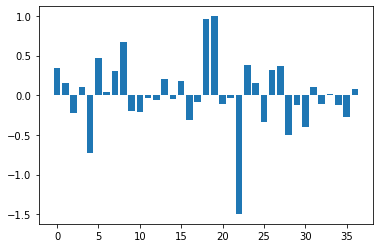

In [48]:
# Logistic regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

# define the model
model = LogisticRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_[0]
print(find_the_best(X.columns,importance))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

                              Feature     Score
18                  bal_personal_loan  0.118236
19                  bal_mortgage_loan  0.103374
24        bal_current_account_starter  0.043753
15       cap_life_insurance_fixed_cap  0.024457
5   has_life_insurance_decreasing_cap  0.019982
0                  homebanking_active  0.016424
26           visits_distinct_so_areas  0.015790
8                   has_mortgage_loan  0.013028
7                   has_personal_loan  0.011656
23        bal_savings_account_starter  0.010074
13                   bal_insurance_21  0.008633
27                 customer_since_all  0.008475
21                 bal_pension_saving  0.007207
3                    has_insurance_23  0.005036
31               brussels_postal_code  0.005013
11        has_savings_account_starter  0.004950
1                     has_homebanking  0.003468
36             customer_self_employed  0.001917
33               wallonia_postal_code  0.001051
6        has_fire_car_other_insurance  0

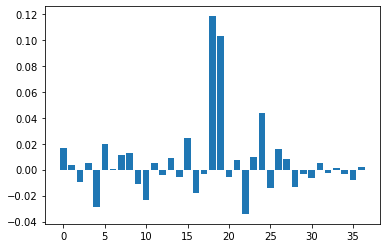

In [50]:
# Linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot

# define the model
model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_
print(find_the_best(X.columns,importance))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## Univariate Selection

Source: https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

In [14]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 10 best features

                              Feature       Score
0                  homebanking_active  514.698751
5   has_life_insurance_decreasing_cap  500.411648
1                     has_homebanking  448.560570
8                   has_mortgage_loan  275.471812
7                   has_personal_loan  233.843880
19                  bal_mortgage_loan  172.807794
16  cap_life_insurance_decreasing_cap   85.478678
18                  bal_personal_loan   55.127824
22                bal_savings_account   50.510833
20                bal_current_account   37.235376
12        has_current_account_starter   36.011273
6        has_fire_car_other_insurance   28.885794
29                    customer_gender   24.125260
11        has_savings_account_starter   22.380328
25                 visits_distinct_so   20.753926
30                customer_birth_date   16.799273
31               brussels_postal_code   16.206449
33               wallonia_postal_code   13.988413
36             customer_self_employed   12.279224


### Train Month 2 Data Results

In [25]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X_train_2,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train_2.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 10 best features

                              Feature       Score
0                  homebanking_active  510.272503
5   has_life_insurance_decreasing_cap  492.276169
1                     has_homebanking  456.373702
8                   has_mortgage_loan  277.793908
7                   has_personal_loan  224.311323
19                  bal_mortgage_loan  169.967559
16  cap_life_insurance_decreasing_cap   82.245936
18                  bal_personal_loan   54.696710
22                bal_savings_account   46.845908
12        has_current_account_starter   36.483601
20                bal_current_account   36.096601
6        has_fire_car_other_insurance   29.301047
29                    customer_gender   24.125260
25                 visits_distinct_so   20.724003
11        has_savings_account_starter   19.223258
30                customer_birth_date   16.799273
31               brussels_postal_code   16.206449
33               wallonia_postal_code   13.988413
36             customer_self_employed   13.765100


## Feature Importance

[0.00813158 0.0074148  0.00843574 0.00187668 0.00052864 0.00684784
 0.01409799 0.00560455 0.00710146 0.00415051 0.00414998 0.00175307
 0.00393228 0.01736985 0.00256054 0.00062918 0.02797592 0.04899123
 0.01351756 0.03549408 0.09586482 0.00516599 0.14236684 0.00233776
 0.00613033 0.02709781 0.01041485 0.1374     0.13637275 0.01755259
 0.14903662 0.00485316 0.00786461 0.00806177 0.00342986 0.01287722
 0.01260954]


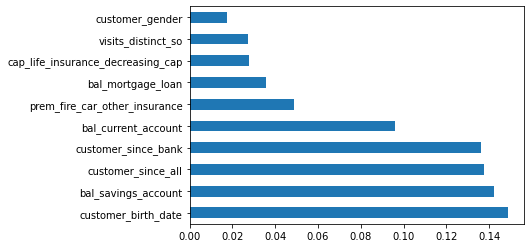

In [15]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

### Train Month 2 Data Results

[0.00763679 0.00756843 0.00829287 0.0020781  0.00053335 0.00678542
 0.01371847 0.00549094 0.00701655 0.00402618 0.00414105 0.00161973
 0.0043241  0.01741795 0.00243314 0.00077701 0.02751732 0.04868525
 0.01387929 0.03515837 0.09583103 0.00505248 0.14280708 0.00249887
 0.00622624 0.0283462  0.01075521 0.13674924 0.13673803 0.0175858
 0.15086831 0.00438346 0.00747345 0.0070815  0.00355054 0.01288829
 0.012064  ]


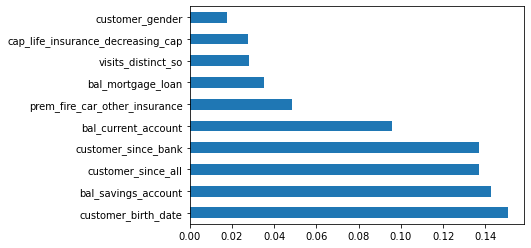

In [26]:
# Use train data
model = ExtraTreesClassifier()
model.fit(X_train_2,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

### Outcomes
* No feature has an outstanding effect on `target` by itself, max effect is `0.14`

## Correlation Matrix with Heatmap

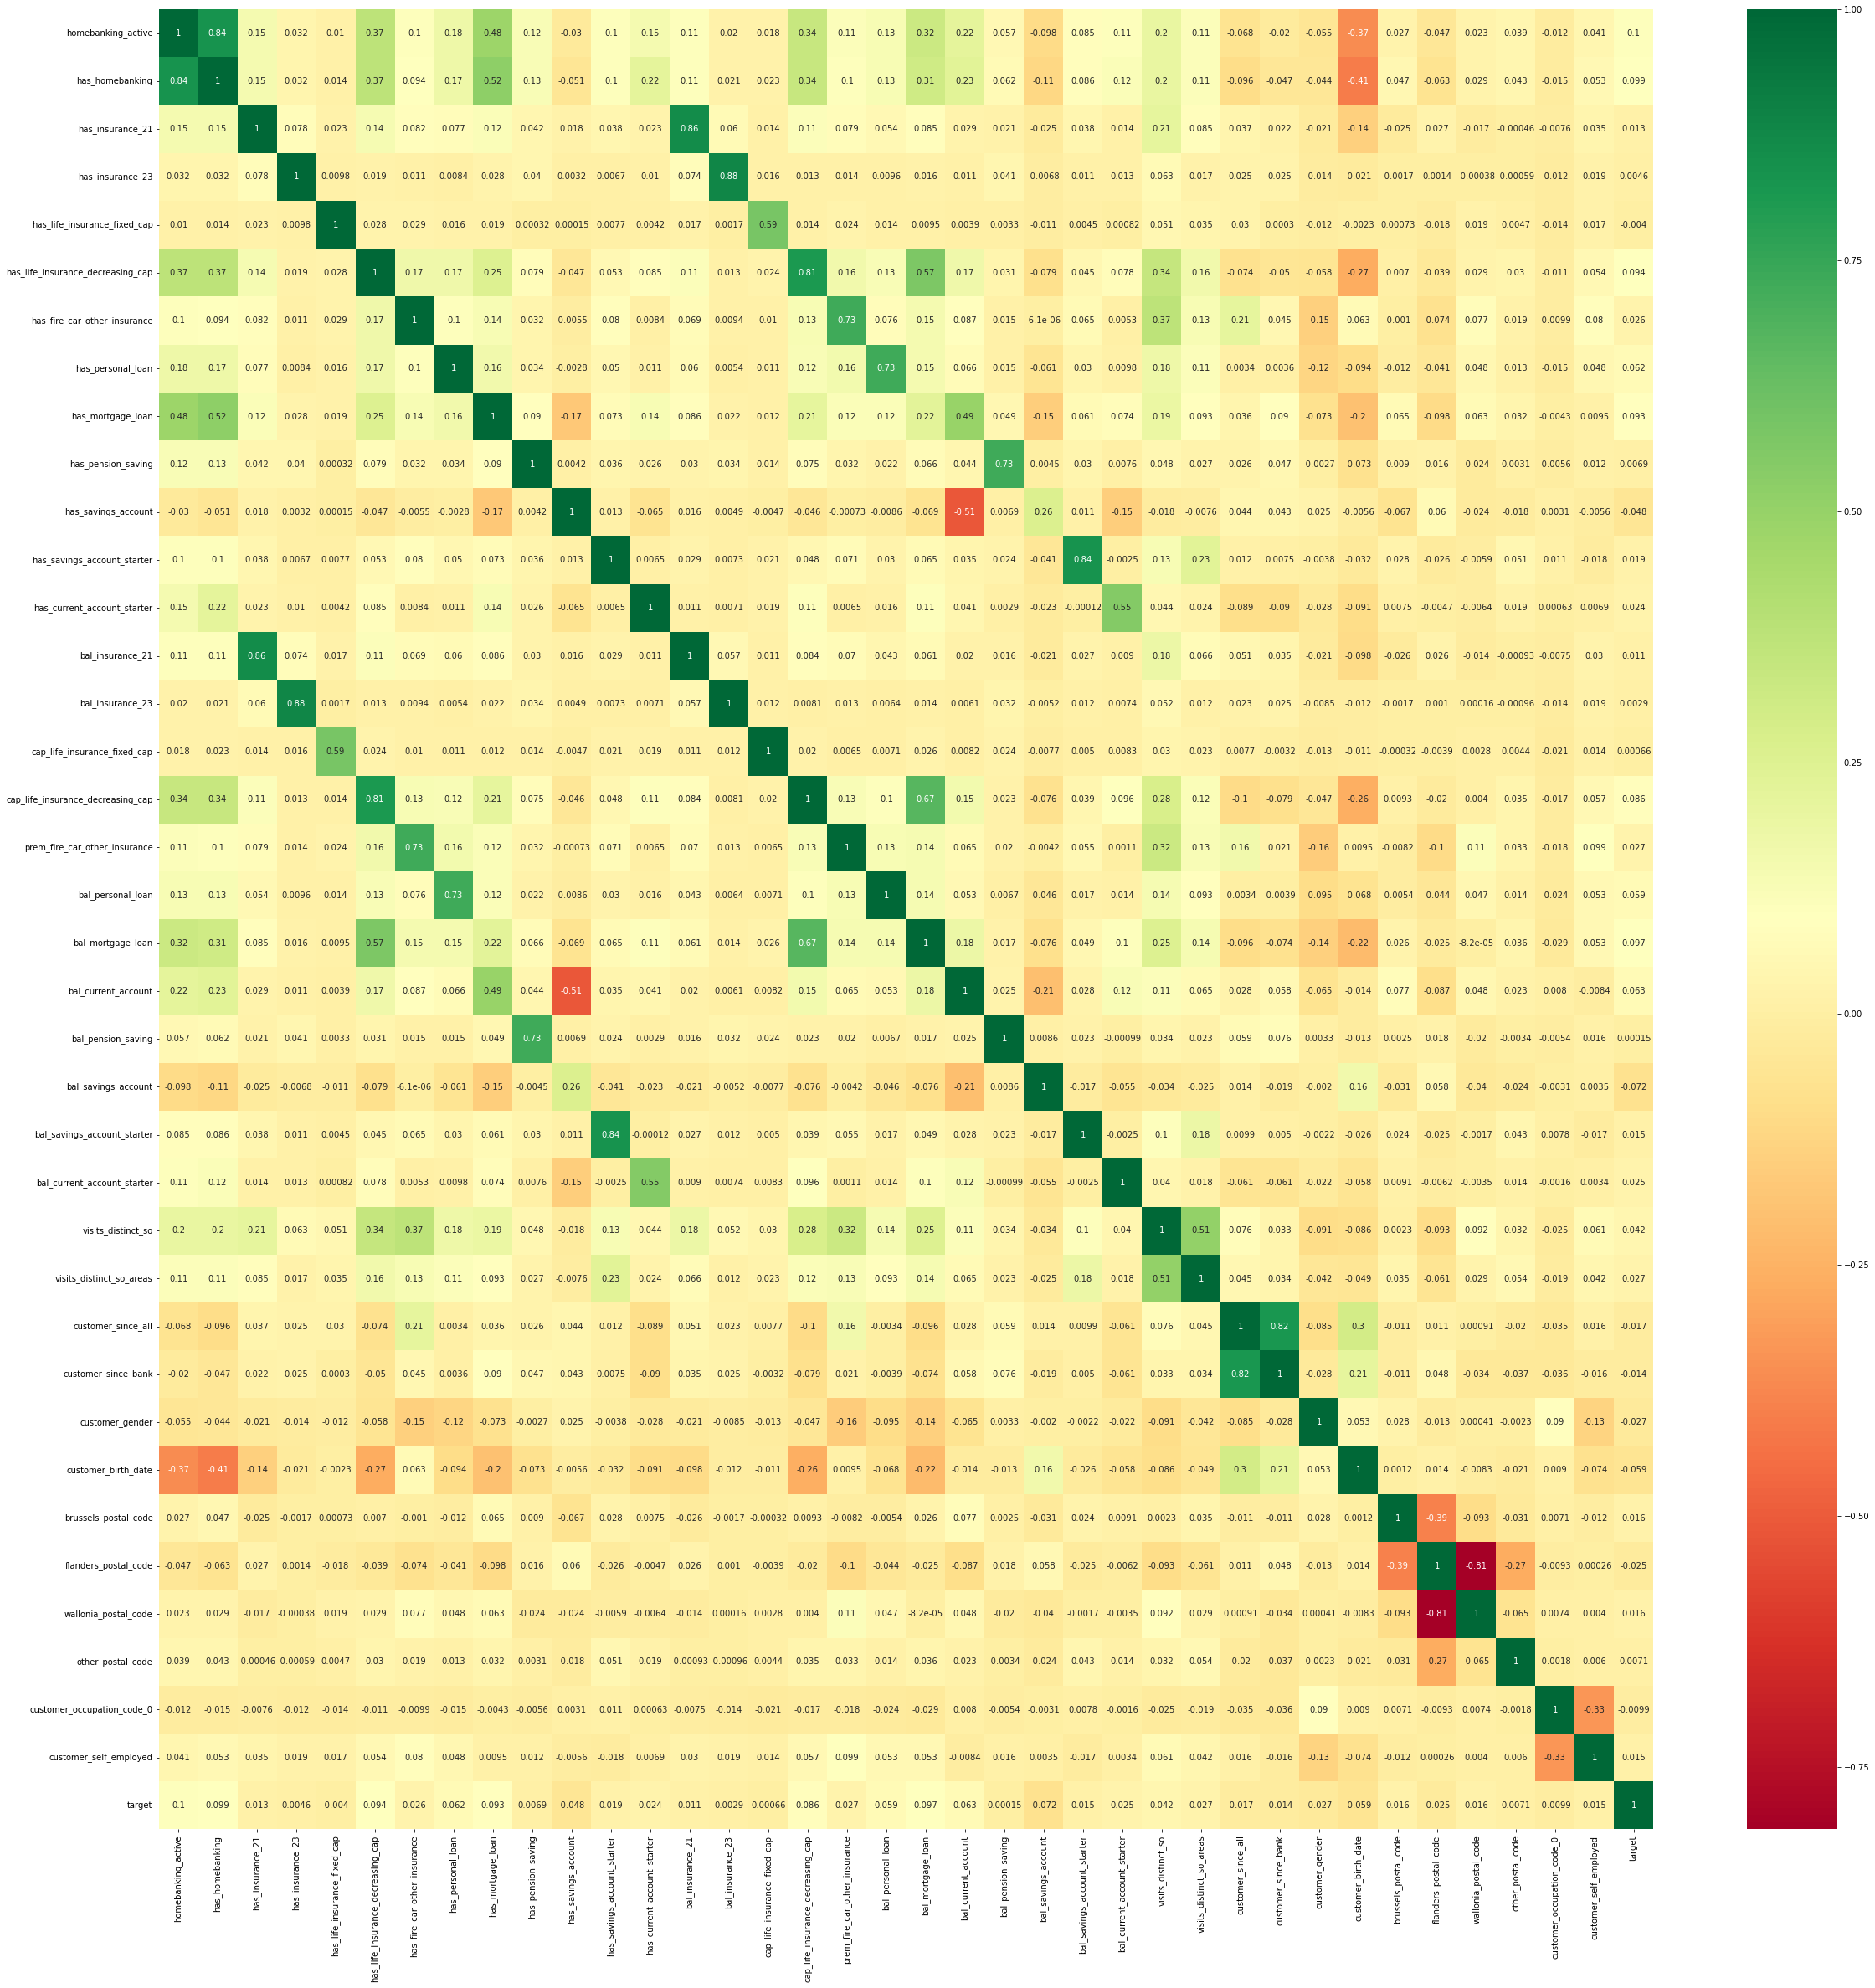

In [21]:
import seaborn as sns

#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(40,40))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### Train Month 2 Data Results

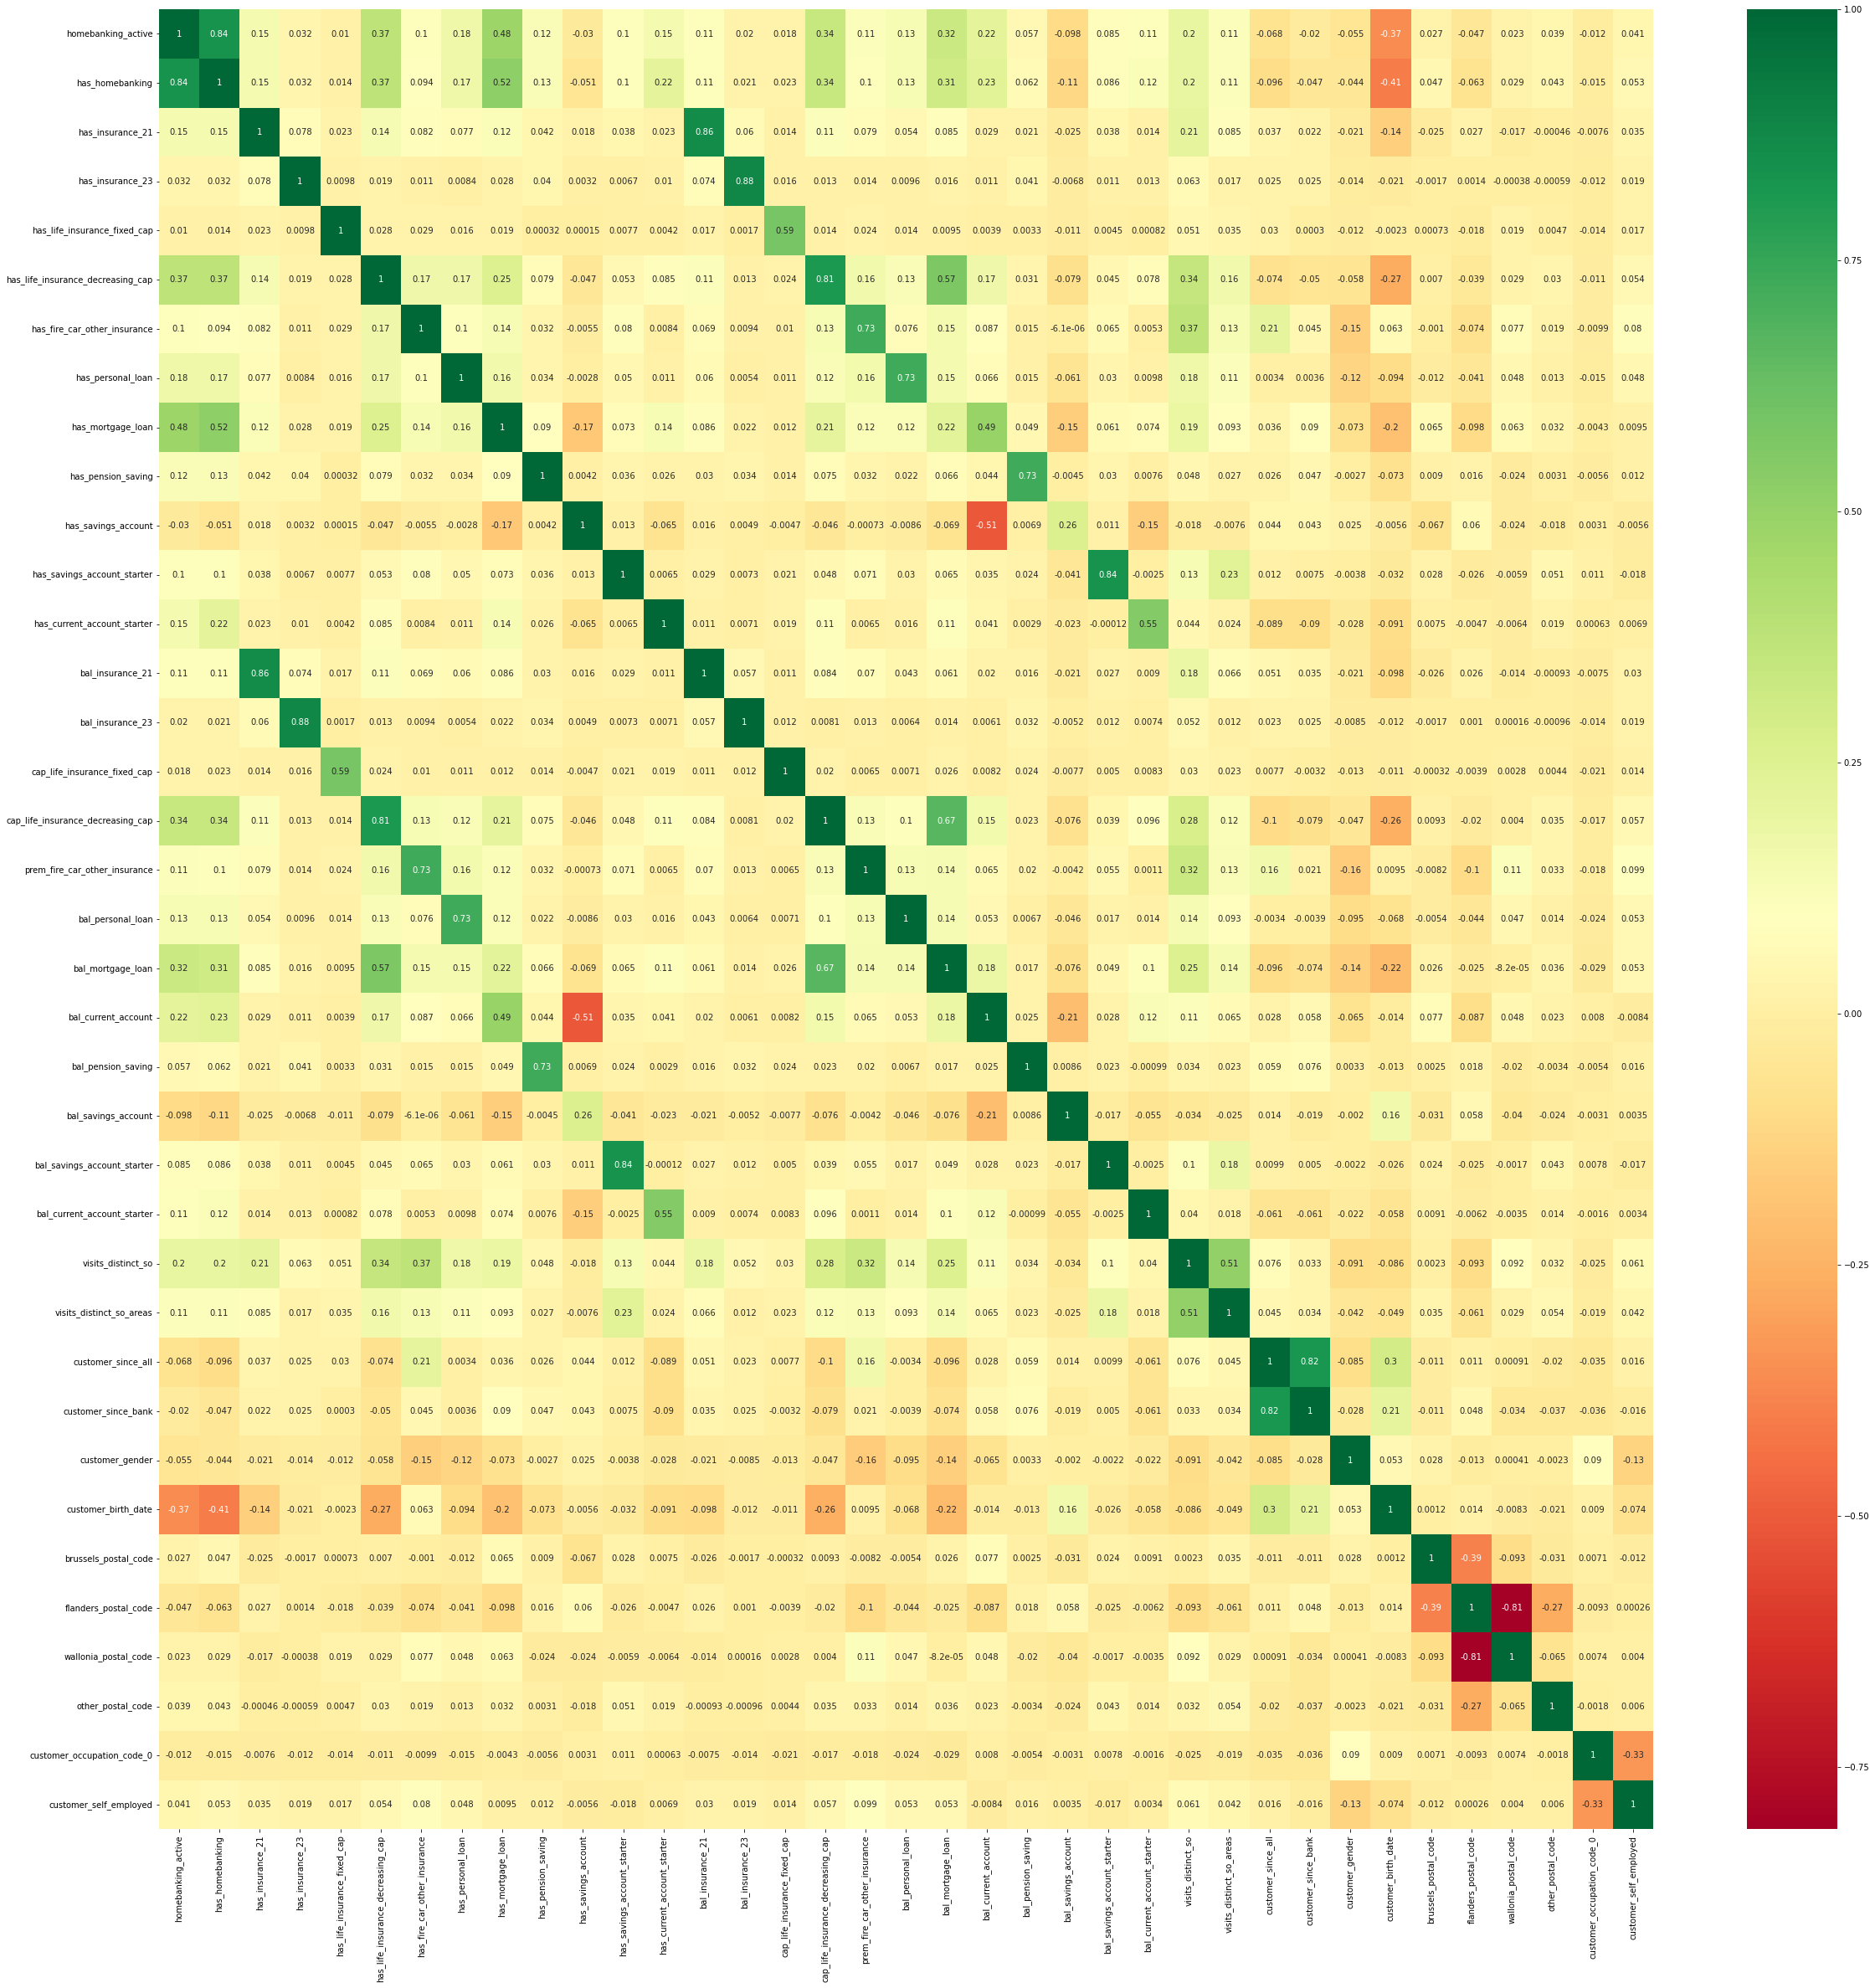

In [27]:
#get correlations of each features in dataset
corrmat = train_2_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(40,40))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## Results
`bal_mortgage_loan`, `bal_personal_loan`, `has_mortgage_loan`, `bal_current_account_starter`, `homebanking_active`, `has_life_insurance_decreasing_cap`, `has_homebanking`, `customer_birth_date`, `bal_savings_account` seem like most relevant features in the first attempt